In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
dat = pd.read_csv('./Data_problem  1.csv', index_col = 'CUST_ID')
dat.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [3]:
dat.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


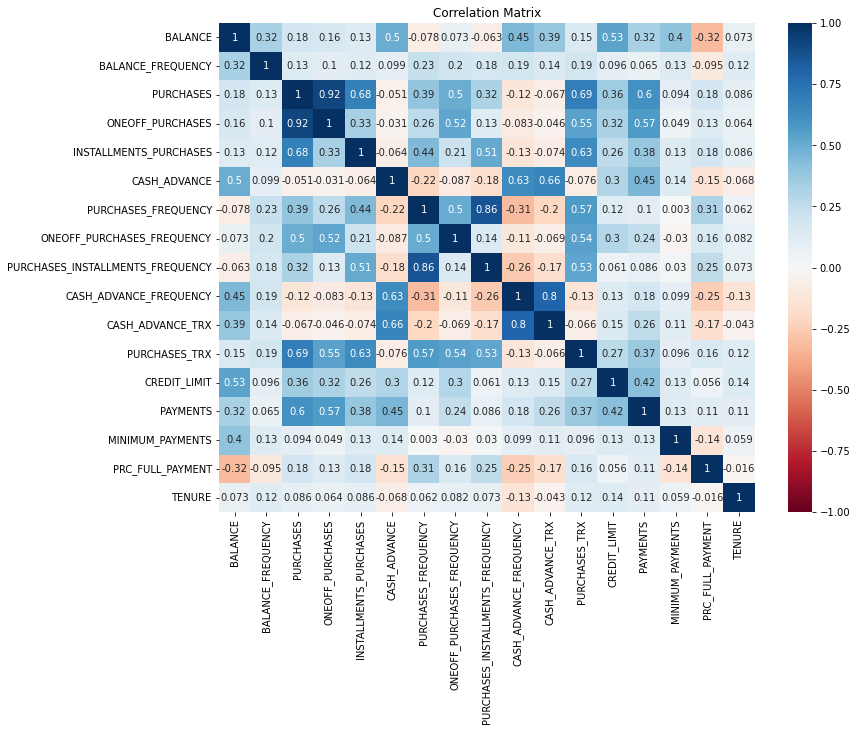

In [4]:
plt.figure(figsize=(12, 9))
s = sns.heatmap(dat.corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

Adding indicators
- Limit usage (balance to credit limit ratio),
- Payments to minimum payments ratio
- Number_of_purchases
- Number_of_cash_advance_transactions
Indicators like Averages would not be useful as we would be normalizing the data before clustering which would lead to redundancies.


In [5]:
dat['LIMIT_USAGE'] = (dat['BALANCE'] / dat['CREDIT_LIMIT'])
dat['Payment-To-Min-Payments'] = (dat['PAYMENTS'] / dat['MINIMUM_PAYMENTS'])
dat['Num_Purchases'] = (dat['PURCHASES']/ dat['PURCHASES_TRX'])
dat['Num_Cash_Advance'] = (dat['CASH_ADVANCE'] / dat['CASH_ADVANCE_TRX'])

dat.replace([np.inf, -np.inf], np.nan, inplace=True)

dat['Num_Purchases'] = dat['Num_Purchases'].fillna(0)
dat['Num_Cash_Advance'] = dat['Num_Cash_Advance'].fillna(0)
dat['Payment-To-Min-Payments'] = dat['Payment-To-Min-Payments'].fillna(0)
dat['CREDIT_LIMIT'] = dat['CREDIT_LIMIT'].fillna(0)
dat['MINIMUM_PAYMENTS'] = dat['MINIMUM_PAYMENTS'].fillna(0)
dat['LIMIT_USAGE'] = dat['LIMIT_USAGE'].fillna(1)

dat.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LIMIT_USAGE,Payment-To-Min-Payments,Num_Purchases,Num_Cash_Advance
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,14.709832,4493.947277,1733.143852,833.983453,0.153715,11.517318,0.388995,9.023079,73.870683,208.905117
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,24.857649,3638.922543,2895.063757,2335.989918,0.292499,1.338331,0.389754,118.177101,160.524939,535.655517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000,0.041533,0.902729,11.983437,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000,0.302982,2.011999,41.393929,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,0.717584,6.027054,78.662304,246.995017
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,15.909951,6840.528861,5981.666667,14836.451410


In [6]:
def z_score_standardization(series):
    return (series - series.mean()) / series.std()
normalized_dat = dat.copy()
for col in dat.columns:
    normalized_dat[col] = z_score_standardization(dat[col])

normalized_dat.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LIMIT_USAGE,Payment-To-Min-Payments,Num_Purchases,Num_Cash_Advance
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,...,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-1.608645e-15,-3.441118e-14,-4.206870e-15,-4.847097e-15,3.155874e-15,-4.613138e-15,-5.104297e-16,-6.032642e-15,2.543291e-15,-7.293520e-15,...,1.327492e-16,-6.378796e-15,5.131711e-16,3.864817e-16,-5.532272e-15,-7.824901e-15,1.226827e-16,-8.845655e-17,1.524107e-15,1.619418e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.515978e-01,-3.703064e+00,-4.695256e-01,-3.569141e-01,-4.545508e-01,-4.667595e-01,-1.221690e+00,-6.786229e-01,-9.169440e-01,-6.753111e-01,...,-5.917628e-01,-1.234966e+00,-5.986548e-01,-3.570150e-01,-5.255216e-01,-4.122537e+00,-9.980516e-01,-7.635218e-02,-4.601820e-01,-3.899990e-01
25%,-6.899692e-01,4.904212e-02,-4.509755e-01,-3.569141e-01,-4.545508e-01,-4.667595e-01,-1.014069e+00,-6.786229e-01,-9.169440e-01,-6.753111e-01,...,-5.515337e-01,-7.952759e-01,-4.662653e-01,-2.872253e-01,-5.255216e-01,3.606594e-01,-8.914906e-01,-6.871339e-02,-3.855304e-01,-3.899990e-01
50%,-3.320101e-01,5.180549e-01,-3.004373e-01,-3.340210e-01,-3.561363e-01,-4.667595e-01,2.404124e-02,-3.992970e-01,-4.976008e-01,-6.753111e-01,...,-3.101594e-01,-4.105466e-01,-3.026677e-01,-2.330297e-01,-5.255216e-01,3.606594e-01,-2.206841e-01,-5.932689e-02,-2.023159e-01,-3.899990e-01
75%,2.352427e-01,5.180549e-01,5.004373e-02,-9.056257e-03,6.365966e-02,6.434882e-02,1.062151e+00,3.269545e-01,9.700964e-01,4.351249e-01,...,9.213130e-02,5.512766e-01,5.802652e-02,-1.937934e-02,-3.712027e-02,3.606594e-01,8.430678e-01,-2.535199e-02,2.984970e-02,7.110895e-02
max,8.397019e+00,5.180549e-01,2.248225e+01,2.419971e+01,2.442552e+01,2.200989e+01,1.269772e+00,2.673302e+00,1.599110e+00,6.820140e+00,...,1.381024e+01,7.009232e+00,1.692133e+01,3.235126e+01,2.893291e+00,3.606594e-01,3.982243e+01,5.780736e+01,3.680298e+01,2.730775e+01


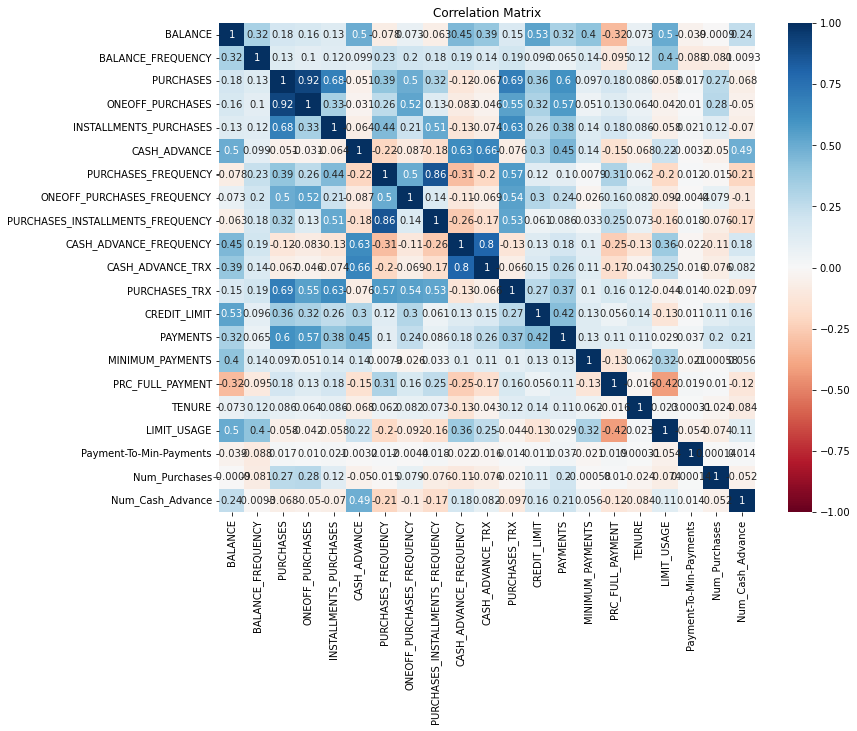

In [7]:
plt.figure(figsize=(12, 9))
s = sns.heatmap(normalized_dat.corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

As we can see, our added indicators have a lower correlation with the preexisting columns thus indicating that they may provide insights that are not directly apparant from the original set of indicators.

Some of the pairs with high correlation(shown with darker blue in the above heat map for positive and red for negative) are:
- Avg amount paid per transaction of different types to the total amount paid in that type
- Indicators related to Oneoff purchases and total purchases
- Purchases and payments (High revenue customers have higher payments)
- Balance and credit limit (Higher balance implies higher credit limit)



In [8]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

In [9]:
normalized_dat.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LIMIT_USAGE,Payment-To-Min-Payments,Num_Purchases,Num_Cash_Advance
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,...,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-1.608645e-15,-3.441118e-14,-4.206870e-15,-4.847097e-15,3.155874e-15,-4.613138e-15,-5.104297e-16,-6.032642e-15,2.543291e-15,-7.293520e-15,...,1.327492e-16,-6.378796e-15,5.131711e-16,3.864817e-16,-5.532272e-15,-7.824901e-15,1.226827e-16,-8.845655e-17,1.524107e-15,1.619418e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.515978e-01,-3.703064e+00,-4.695256e-01,-3.569141e-01,-4.545508e-01,-4.667595e-01,-1.221690e+00,-6.786229e-01,-9.169440e-01,-6.753111e-01,...,-5.917628e-01,-1.234966e+00,-5.986548e-01,-3.570150e-01,-5.255216e-01,-4.122537e+00,-9.980516e-01,-7.635218e-02,-4.601820e-01,-3.899990e-01
25%,-6.899692e-01,4.904212e-02,-4.509755e-01,-3.569141e-01,-4.545508e-01,-4.667595e-01,-1.014069e+00,-6.786229e-01,-9.169440e-01,-6.753111e-01,...,-5.515337e-01,-7.952759e-01,-4.662653e-01,-2.872253e-01,-5.255216e-01,3.606594e-01,-8.914906e-01,-6.871339e-02,-3.855304e-01,-3.899990e-01
50%,-3.320101e-01,5.180549e-01,-3.004373e-01,-3.340210e-01,-3.561363e-01,-4.667595e-01,2.404124e-02,-3.992970e-01,-4.976008e-01,-6.753111e-01,...,-3.101594e-01,-4.105466e-01,-3.026677e-01,-2.330297e-01,-5.255216e-01,3.606594e-01,-2.206841e-01,-5.932689e-02,-2.023159e-01,-3.899990e-01
75%,2.352427e-01,5.180549e-01,5.004373e-02,-9.056257e-03,6.365966e-02,6.434882e-02,1.062151e+00,3.269545e-01,9.700964e-01,4.351249e-01,...,9.213130e-02,5.512766e-01,5.802652e-02,-1.937934e-02,-3.712027e-02,3.606594e-01,8.430678e-01,-2.535199e-02,2.984970e-02,7.110895e-02
max,8.397019e+00,5.180549e-01,2.248225e+01,2.419971e+01,2.442552e+01,2.200989e+01,1.269772e+00,2.673302e+00,1.599110e+00,6.820140e+00,...,1.381024e+01,7.009232e+00,1.692133e+01,3.235126e+01,2.893291e+00,3.606594e-01,3.982243e+01,5.780736e+01,3.680298e+01,2.730775e+01


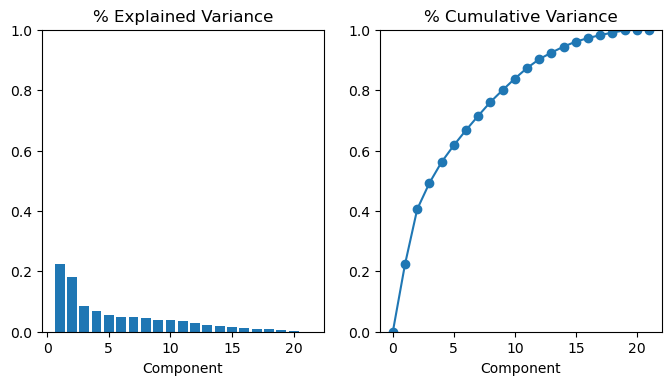

In [10]:
normalized_dat.columns
XX = normalized_dat.copy()

from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(XX)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names, index = XX.index)

X_pca.head()
plot_variance(pca);

In [11]:
display(XX)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LIMIT_USAGE,Payment-To-Min-Payments,Num_Purchases,Num_Cash_Advance
CUST_ID,,,,,,,,,,,,,,,,,,,,,
C10001,-0.731948,-0.249421,-0.424876,-0.356914,-0.349059,-0.466759,-0.806445,-0.678623,-0.707274,-0.675311,...,-0.511305,-0.960160,-0.528949,-0.297293,-0.525522,0.360659,-0.893112,-0.064112,-0.163032,-0.389999
C10002,0.786917,0.134317,-0.469526,-0.356914,-0.454551,2.605459,-1.221690,-0.678623,-0.916944,0.573931,...,-0.591763,0.688680,0.818596,0.102037,0.234214,0.360659,0.175754,-0.043975,-0.460182,2.617039
C10003,0.447110,0.518055,-0.107662,0.108882,-0.454551,-0.466759,1.269772,2.673302,-0.916944,-0.675311,...,-0.109014,0.826083,-0.383783,-0.088484,-0.525522,0.360659,-0.144471,-0.067961,-0.058806,-0.389999
C10004,0.049096,-1.016896,0.232045,0.546159,-0.454551,-0.368633,-1.014069,-0.399297,-0.916944,-0.258899,...,-0.551534,0.826083,-0.598655,-0.357015,-0.525522,0.360659,-0.427890,-0.076352,8.877931,-0.005819
C10005,-0.358755,0.518055,-0.462037,-0.347275,-0.454551,-0.466759,-1.014069,-0.399297,-0.916944,-0.675311,...,-0.551534,-0.905199,-0.364347,-0.252224,-0.525522,0.360659,0.750304,-0.052904,-0.360509,-0.389999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,-0.737909,0.518055,-0.333274,-0.356914,-0.132636,-0.466759,1.269772,-0.678623,1.179767,-0.675311,...,-0.350388,-0.960160,-0.486189,-0.336088,1.183885,-4.122537,-0.924945,-0.019994,-0.157924,-0.389999
C19187,-0.742382,0.518055,-0.329118,-0.356914,-0.122817,-0.466759,1.269772,-0.678623,1.179767,-0.675311,...,-0.350388,-0.960160,-0.503368,-0.357015,-0.525522,-4.122537,-0.948833,-0.076352,-0.148704,-0.389999
C19188,-0.740357,-0.185466,-0.401943,-0.356914,-0.294876,-0.466759,0.854528,-0.678623,0.760426,-0.675311,...,-0.390617,-0.960160,-0.570583,-0.321733,0.329182,-4.122537,-0.938017,-0.068008,-0.280272,-0.389999


In [12]:
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X = X_pca.copy()

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

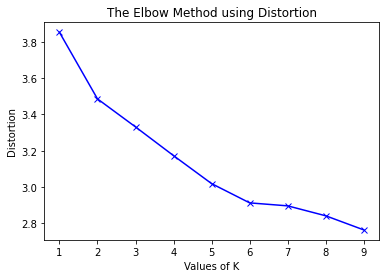

In [13]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

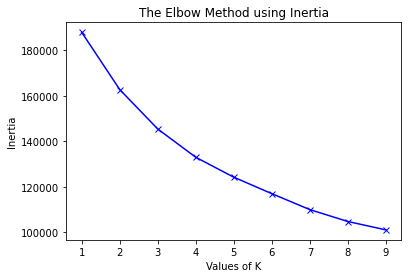

In [14]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Thus the ideal value of K appears to be between 2 and 4 as per the two methods. So we take it to be 3.

In [15]:
X = X_pca.copy()
kmeans = KMeans(n_clusters=3)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")
XY = X.copy()
XY = XX.join(XY)
XY

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,Cluster
CUST_ID,,,,,,,,,,,,,,,,,,,,,
C10001,-0.731948,-0.249421,-0.424876,-0.356914,-0.349059,-0.466759,-0.806445,-0.678623,-0.707274,-0.675311,...,0.035816,-0.779536,0.157118,0.267239,-0.407941,-0.200190,0.148189,0.034284,-0.000177,0
C10002,0.786917,0.134317,-0.469526,-0.356914,-0.454551,2.605459,-1.221690,-0.678623,-0.916944,0.573931,...,-0.095409,-0.052895,0.105574,0.301553,-0.469881,-0.010894,-0.564796,-0.074353,0.000011,1
C10003,0.447110,0.518055,-0.107662,0.108882,-0.454551,-0.466759,1.269772,2.673302,-0.916944,-0.675311,...,-0.513713,0.075362,0.806582,-0.725734,-0.318963,-0.083916,0.214005,0.512748,0.000012,0
C10004,0.049096,-1.016896,0.232045,0.546159,-0.454551,-0.368633,-1.014069,-0.399297,-0.916944,-0.258899,...,-1.598273,0.724769,-1.325980,1.278026,0.300136,0.099337,-0.273943,-0.128221,0.000151,0
C10005,-0.358755,0.518055,-0.462037,-0.347275,-0.454551,-0.466759,-1.014069,-0.399297,-0.916944,-0.675311,...,0.058987,-0.107181,0.518144,0.141899,-0.181136,0.190312,0.091480,-0.066268,-0.000095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,-0.737909,0.518055,-0.333274,-0.356914,-0.132636,-0.466759,1.269772,-0.678623,1.179767,-0.675311,...,1.025087,-0.455666,0.345558,0.205688,-0.200086,-0.044405,0.415205,0.149991,-0.000184,0
C19187,-0.742382,0.518055,-0.329118,-0.356914,-0.122817,-0.466759,1.269772,-0.678623,1.179767,-0.675311,...,1.231641,-1.069235,0.576501,0.104976,-0.149441,-0.010123,0.394663,0.182459,-0.000217,0
C19188,-0.740357,-0.185466,-0.401943,-0.356914,-0.294876,-0.466759,0.854528,-0.678623,0.760426,-0.675311,...,1.011972,-0.485343,0.435520,0.180977,-0.194574,0.000145,0.379298,0.151927,-0.000181,0


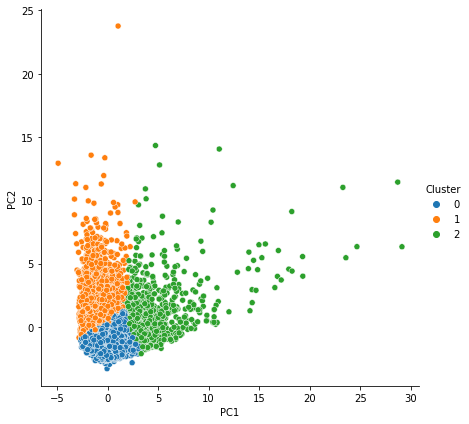

In [16]:
sns.relplot(
    x="PC1", y="PC2", hue="Cluster", data=X, height=6,
);

In [17]:
p = pca.components_[:3]
print(p.shape)
p = abs(p)
r = p.sum(axis = 0)
r = r.reshape((1,21))
map = pd.DataFrame(r,columns=normalized_dat.columns)

(3, 21)


Here we have taken the absolute value of the covariance to ensure that 

<AxesSubplot:>

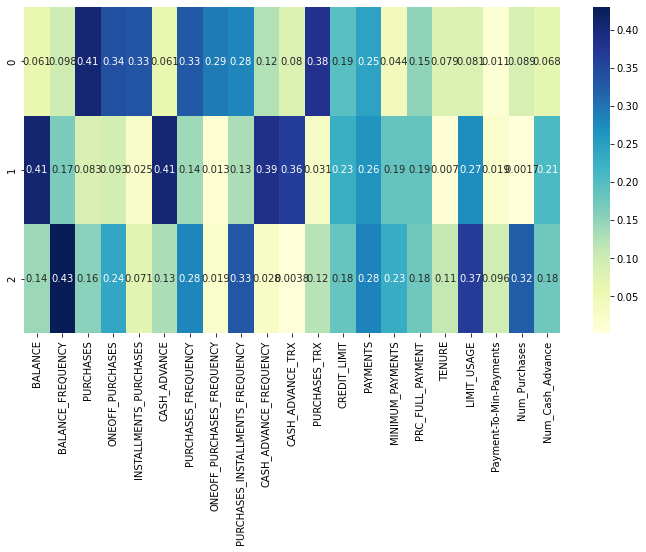

In [18]:
map = pd.DataFrame(p,columns=normalized_dat.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='YlGnBu', annot = True)

<AxesSubplot:>

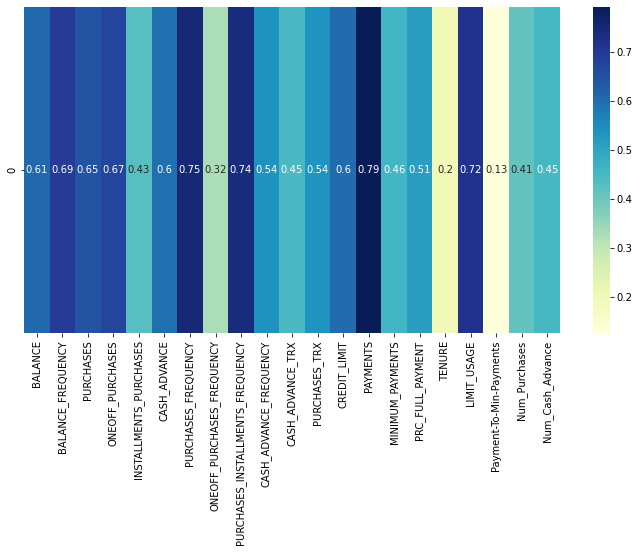

In [19]:
map = pd.DataFrame(r,columns=normalized_dat.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='YlGnBu', annot = True)

In the first ten principal components the classes with the maximum correlatio are TENURE, MINIMUM_PAYMENTS, Num_Products and Num_Cash_Advances

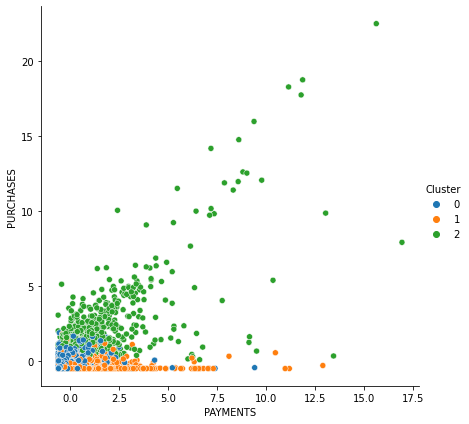

In [20]:
sns.relplot(
    x="PAYMENTS", y="PURCHASES", hue="Cluster", data=XY, height=6,
);

%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

In [40]:
Y = dat.copy()
Y["Cluster"] =  XY["Cluster"]
headers = ['count', 'mean', 'min', 'max']
for col in Y.columns[:-1]:
    print(col)
    print(Y.groupby("Cluster")[col].describe()[headers])

BALANCE
          count         mean        min           max
Cluster                                              
0        4892.0   567.773622   0.000000   5901.592192
1        3218.0  2712.019428   1.691842  16304.889250
2         840.0  2972.884081  12.659909  19043.138560
BALANCE_FREQUENCY
          count      mean       min  max
Cluster                                 
0        4892.0  0.812450  0.000000  1.0
1        3218.0  0.947629  0.090909  1.0
2         840.0  0.985238  0.090909  1.0
PURCHASES
          count         mean     min       max
Cluster                                       
0        4892.0   763.374225    0.00   5080.85
1        3218.0   238.931563    0.00   4900.00
2         840.0  5327.827119  767.13  49039.57
ONEOFF_PURCHASES
          count         mean  min       max
Cluster                                    
0        4892.0   385.500399  0.0   4768.27
1        3218.0   158.427548  0.0   4900.00
2         840.0  3460.269845  0.0  40761.25
INSTALLMENTS_PURC

Now, based on the above stats, we can rougly classify the three clusters as:
- Cluster 0 - Regular Customers: This group of customers has the maximum number of customers (54 %). They have the lowest average Balance and credit limit, and moderate purchase frequency.
- Cluster 1 - Cash: This group of customers majorly use their cards for cash_advance and don't use it as much for purchases. It has a significant amount of the population. It has very low percentage of months with full payment(less than one-tenth of the other classes).
- Cluster 2 - Premium Customers: While number of people in this group is less, they have both high number of purchases as well as high Purchases_Trx (avg amount spent per transaction).

# Strategic Insights
Knowing the above cluster characteristics, we can apply the following strategies for them:
- Cluster 0 - Regular Customers : This group has the potential to become premium customers. We can encourage them to use their cards more by providing a higher credit limit to them.
- Cluster 1 - Cash_Advance : As we can see that they are irregular in their payments, we should increase the charges for this group to encourage them to be more regular with their payments.
- Cluster 2 - Premium Customers : We need to ensure that we don't lose this segment. Thus we should work on retaining them by perhaps providing them with premium cards with more benefits.